<a href="https://colab.research.google.com/github/Francsco99/DSSAFinance/blob/main/Tesina_DSSA_finanza_yahoo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description: This program attempts to optimize a users portfolio using the Efficient Frontier & Python


In [ ]:
#Import the python libraries

#pandas is used to retrieve data from yahoo finance
from pandas_datareader import data as web
import pandas as pd

#yahoo finance
!pip install yfinance
import yfinance as yfin
yfin.pdr_override()

import numpy as np

#random library to generate weights values
import random

#matplotlib to plot the data
import matplotlib.pyplot as plt
plt.style.use('classic')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 68.6 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [ ]:
#Portfolio definition, first 100 stocks of SP500 index

#removed BKNG for plot legibility
#Added FRT
sp500_first100 = ['AAPL','MSFT','AMZN','GOOGL','BRK-B','GOOG','XOM','UNH','JNJ','NVDA','JPM','V','TSLA','PG','CVX','HD','MA','META',
                  'MRK','LLY','ABBV','PFE','PEP','KO','BAC','TMO','AVGO','COST','WMT','ABT','MCD','CSCO','DIS','DHR','ACN','VZ','CMCSA',
                  'NEE','WFC','LIN','ADBE','PM','NKE','BMY','TXN','COP','CRM','NFLX','AMGN','RTX','T','HON','ORCL','QCOM','UPS','CAT','IBM',
                  'UNP','LOW','MS','SPGI','SBUX','GS','INTC','SCHW','BA','CVS','ELV','DE','PLD','BLK','AMD','INTU','MDT','GILD','AMT','LMT',
                  'ADP','C','CI','TJX','AMAT','CB','ISRG','AXP','PYPL','MDLZ','TMUS','NOW','SYK','ADI','MMC','GE','SLB','MO','VRTX','DUK','EOG',
                  'REGN','FRT']

In [ ]:
#Portfolio definition, i choose the stocks
my_portfolio = ['GC=F','NVR','BKNG','AZO','CMG','IMMR']

In [ ]:
#Generate a array of random weights for the stokcs in the portfolio my_portfolio

num_stocks = len(my_portfolio) #choose here the portfolio

# Generate a array of 50 random numbers between 0 and 1
weights = np.array([random.uniform(0,1) for _ in range(num_stocks)])

# Scale the numbers so that their sum is equal to 1
s = np.sum(weights)
weights = np.round(weights/s, 5)

print(weights)

[0.15555 0.15968 0.09019 0.04889 0.33344 0.21225]


In [ ]:
#Or assing custom weights

#weights = np.array([0.1, 0.1])

In [ ]:
#Get the portfolio starting date
stockStartDate = '2018-01-01'

#Get the portfolio ending date
stockEndDate = '2020-01-01'

In [ ]:
#Get the Adjusted Close information for each stock in the portfolio
df = web.get_data_yahoo(my_portfolio, stockStartDate,stockEndDate)['Adj Close']

[*********************100%***********************]  6 of 6 completed


In [ ]:
#Show the values of the data frame
df

,AZO,BKNG,CMG,GC=F,IMMR,NVR
Date,,,,,,
2018-01-02 00:00:00-05:00,736.539978,1784.750000,292.950012,1313.699951,6.968404,3529.610107
2018-01-03 00:00:00-05:00,749.429993,1824.160034,309.000000,1316.199951,7.351715,3562.830078
2018-01-04 00:00:00-05:00,761.260010,1807.250000,307.109985,1319.400024,7.273087,3520.510010
2018-01-05 00:00:00-05:00,775.500000,1823.540039,313.790009,1320.300049,7.410686,3567.000000
2018-01-08 00:00:00-05:00,766.479980,1851.810059,318.470001,1318.599976,7.518799,3624.800049
...,...,...,...,...,...,...
2019-12-24 00:00:00-05:00,1219.310059,2044.000000,828.890015,1499.099976,7.715369,3817.149902
2019-12-26 00:00:00-05:00,1210.719971,2064.320068,838.599976,1509.300049,7.636741,3810.550049
2019-12-27 00:00:00-05:00,1202.589966,2072.540039,836.789978,1513.800049,7.450000,3816.370117


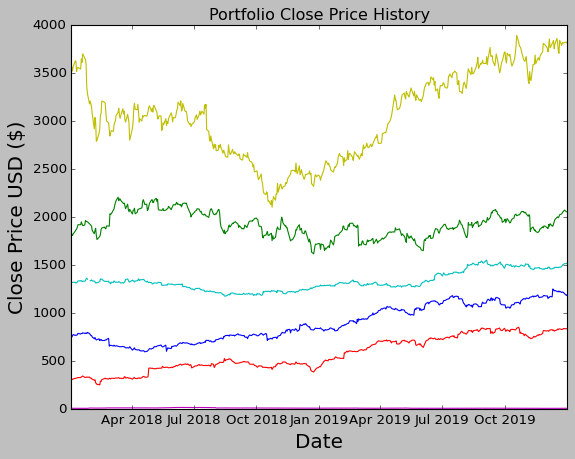

In [ ]:
#Visually show the portfolio
title = 'Portfolio Close Price History'

#Get the stocks
my_stocks = df

#Create and plot the graph
for c in my_stocks.columns.values:
  plt.plot(my_stocks[c], label = c)
plt.title(title)
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
#plt.legend(my_stocks.columns.values, loc = 'upper right')

#Download plot
#plt.savefig("fig.pdf")
#from google.colab import files
#files.download("fig.pdf")

#Show the plot
plt.show()

In [ ]:
#Calculate the daily simple return = stock_price/stock_price_precedent -1
returns = df.pct_change()

#Show the daily simple return
returns

,AZO,BKNG,CMG,GC=F,IMMR,NVR
Date,,,,,,
2018-01-02 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03 00:00:00-05:00,0.017501,0.022082,0.054787,0.001903,0.055007,0.009412
2018-01-04 00:00:00-05:00,0.015785,-0.009270,-0.006117,0.002431,-0.010695,-0.011878
2018-01-05 00:00:00-05:00,0.018706,0.009014,0.021751,0.000682,0.018919,0.013205
2018-01-08 00:00:00-05:00,-0.011631,0.015503,0.014914,-0.001288,0.014589,0.016204
...,...,...,...,...,...,...
2019-12-24 00:00:00-05:00,0.004482,0.005856,0.000724,0.011197,0.003836,0.008039
2019-12-26 00:00:00-05:00,-0.007045,0.009941,0.011714,0.006804,-0.010191,-0.001729
2019-12-27 00:00:00-05:00,-0.006715,0.003982,-0.002158,0.002982,-0.024453,0.001527


In [ ]:
#Create and show the annualized covariance matrix
cov_matrix_annual = returns.cov() * 252 #252 trading days in a year

#Show the matrix
cov_matrix_annual

,AZO,BKNG,CMG,GC=F,IMMR,NVR
AZO,0.058570,0.007740,0.014643,-0.000399,0.007510,0.011024
BKNG,0.007740,0.062657,0.019105,-0.001358,0.024609,0.016333
CMG,0.014643,0.019105,0.133087,-0.000625,0.019796,0.027678
GC=F,-0.000399,-0.001358,-0.000625,0.012211,0.001407,0.002142
IMMR,0.007510,0.024609,0.019796,0.001407,0.244065,0.007738
NVR,0.011024,0.016333,0.027678,0.002142,0.007738,0.085478


In [ ]:
#Calculate the portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual,weights))
port_variance

0.0450964855955368

In [ ]:
#Calculate the portfolio volatility aka standard deviation
port_volatility = np.sqrt(port_variance)
port_volatility

0.21235933131260515

In [ ]:
#Calculate the annual portfolio return
portfolioSimpleAnnualReturn = np.sum(returns.mean()*weights)*252
portfolioSimpleAnnualReturn

0.18018176324008356

In [ ]:
#Show the expected annual return, volatility (risk), and variance

percent_var = str(round(port_variance,2)*100)+'%'
percent_vols = str(round(port_volatility,2)*100)+'%'
percent_ret = str(round(portfolioSimpleAnnualReturn,2)*100)+'%'

print('Expected annual return: '+ percent_ret)
print('Annual volatility (risk): '+percent_vols)
print('Annual variance: '+percent_var)

Expected annual return: 18.0%
Annual volatility (risk): 21.0%
Annual variance: 5.0%


In [ ]:
pip install PyPortfolioOpt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 KB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 100.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 115.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6


In [ ]:
from pypfopt.efficient_frontier import efficient_frontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [ ]:
from pypfopt.efficient_frontier.efficient_semivariance import EfficientFrontier
#Portfolio Optimization!

#Calculate the expected returns and the annualised sample covariance matrix of asset returns

mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

#Optimize for maximal Sharpe Ratio
ef = EfficientFrontier(mu,S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('AZO', 0.24711), ('BKNG', 0.0), ('CMG', 0.36955), ('GC=F', 0.38334), ('IMMR', 0.0), ('NVR', 0.0)])
Expected annual return: 35.3%
Annual volatility: 16.1%
Sharpe Ratio: 2.07


(0.3529695189898953, 0.1611457270962799, 2.0662634063573755)

In [ ]:
#Get the discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights,latest_prices, total_portfolio_value=15000)

allocation, leftover = da.lp_portfolio()
print('Discrete allocation: ',allocation)
print('Funds remaining: ${:.2f}'.format(leftover))

Discrete allocation:  {'AZO': 3, 'CMG': 6, 'GC=F': 4, 'IMMR': 15}
Funds remaining: $215.87
